<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**


In [4]:
#make sure you have installed this packeges
# piplite.install(['pandas'])
# piplite.install(['matplotlib'])
# piplite.install(['numpy'])
# piplite.install(['scikit-learn'])


In [5]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import requests
%matplotlib inline

In [6]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

**Downloading Data**

In [7]:
response=requests.get(path)

In [8]:
with open ("FuelConsumptionCo2.csv","wb") as file :
  file.write(response.content)


**Reading the data in**

In [9]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [10]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
#Data Exploration
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


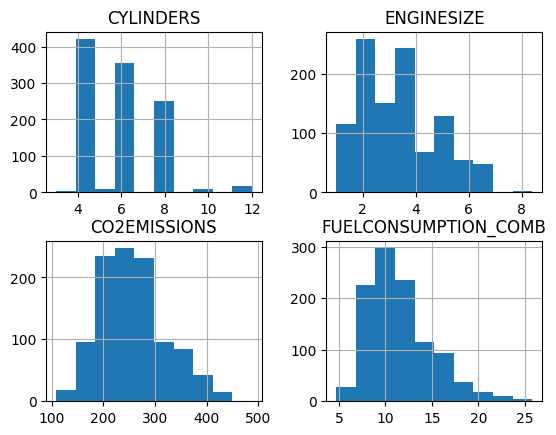

In [13]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

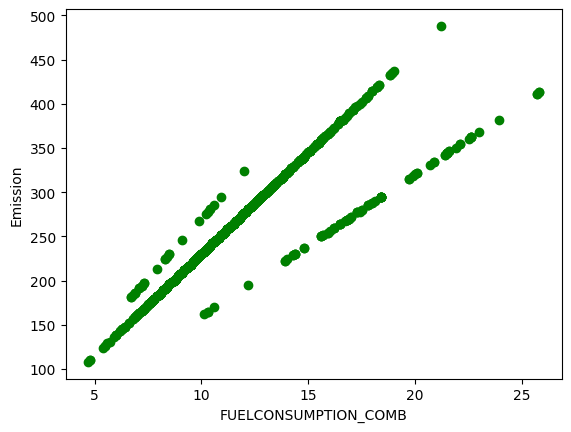

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

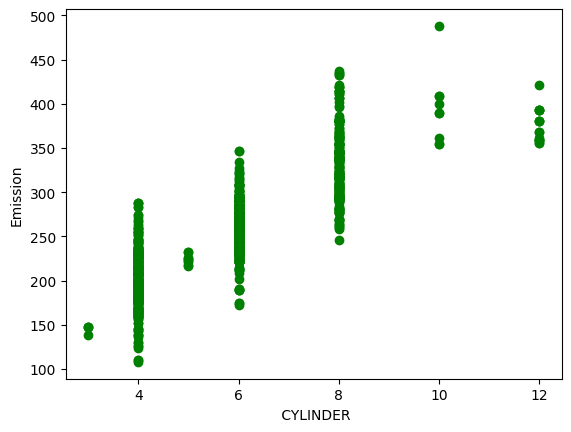

In [15]:
#Plot CYLINDER vs the Emission, to see how linear is their relationship is:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='green')
plt.xlabel(" CYLINDER")
plt.ylabel("Emission")
plt.show()


**Creating train and test dataset**
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [16]:
mask= np.random.rand(len(cdf))< 0.8
train =cdf[mask]
test= cdf[~mask]
print("Test",test.head())
print("Train",train.head())


Test     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0          2.0          4                   8.5           196
4          3.5          6                  10.6           244
8          3.7          6                  11.6           267
11         3.5          6                  10.4           239
18         5.9         12                  15.6           359
Train    ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232


**Simple Regression Model**
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

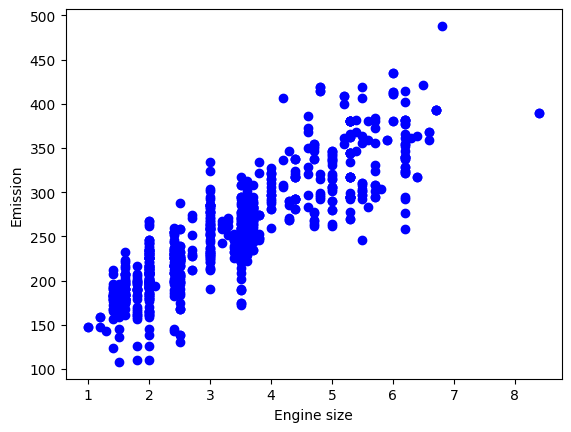

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Using sklearn package to model data.**

Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

In [37]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']]) # Convert the input to an ndarray
train_y = np.asanyarray(train[['CO2EMISSIONS']]) # Convert the input to an ndarray
regr.fit(train_x, train_y) #fit(X, y[, sample_weight])Fit the model according to the given training data.
# The coefficients
print ('Coefficients: ', regr.coef_) #coef_ is of shape (1, n_features) when the given problem is binary
print ('Intercept: ',regr.intercept_) #intercept_ndarray of shape (1,) or (n_classes,)


Coefficients:  [[38.98885413]]
Intercept:  [125.17493915]


(840, 1)

**numpy.asanyarray**

*Convert the input to an ndarray, but pass ndarray subclasses through.*
An ndarray is a (usually fixed-size) multidimensional container of items of the same type and size. The number of dimensions and items in an array is defined by its shape, which is a tuple of N non-negative integers that specify the sizes of each dimension. The type of items in the array is specified by a separate data-type object (dtype), one of which is associated with each ndarray.

**We can plot the fit line over the data**

(840, 1)
(1, 1)
(1,)


Text(0, 0.5, 'Emission')

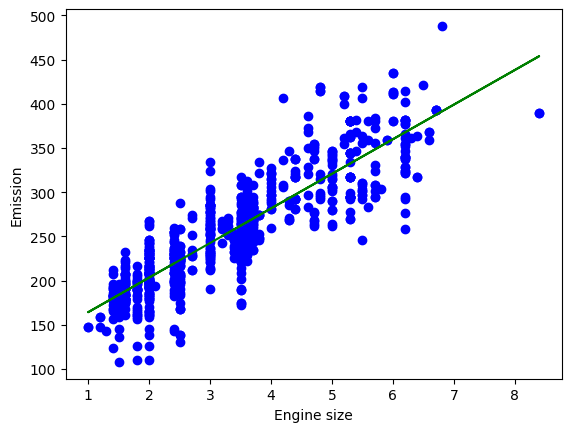

In [25]:
print(train_x.shape)
print(regr.coef_.shape)
print(regr.intercept_.shape)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'green')# y=wa+b
plt.xlabel("Engine size")
plt.ylabel("Emission")

###there are so many way to get job done this is another way to split a dataset into train and test sets**

Train set: (853, 1) (853, 1)
Test set: (214, 1) (214, 1)
Coefficients:  [[39.116937]]
Intercept:  [125.14677576]


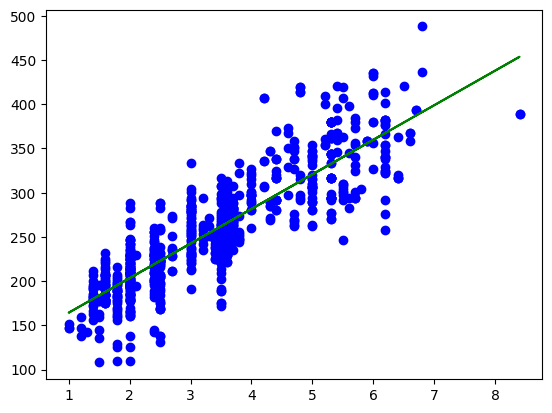

In [38]:
X=df[['ENGINESIZE']]
Y=df[['CO2EMISSIONS']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
regr1.fit(X_train,y_train)
print ('Coefficients: ', regr1.coef_) #coef_ is of shape (1, n_features) when the given problem is binary
print ('Intercept: ',regr1.intercept_) #intercept_ndarray of shape (1,) or (n_classes,)
plt.scatter(X_train.ENGINESIZE,y_train.CO2EMISSIONS,color="b")
plt.plot(X_train,regr1.coef_[0][0]*X_train+regr1.intercept_[0],'green')

##another way

Text(0, 0.5, 'Emission')

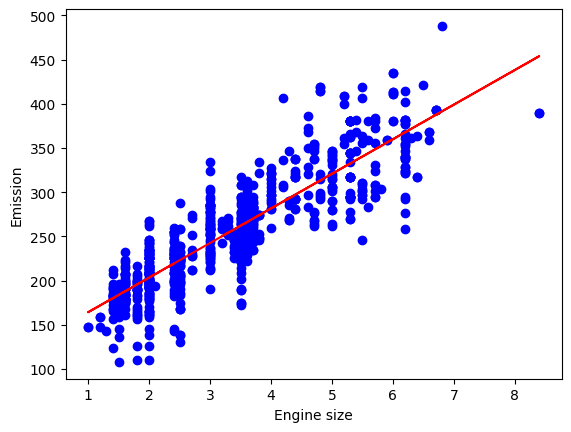

In [26]:
W=regr.coef_[0][0]
b=regr.intercept_[0]
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x,W*train_x+b,'-r')# y=wa+b
plt.xlabel("Engine size")
plt.ylabel("Emission")

##**Evaluation**
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

**Mean Absolute Error:** It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

**Mean Squared Error (MSE):**  Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

**Root Mean Squared Error (RMSE)**.

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_hat) )


Mean absolute error: 23.79
Residual sum of squares (MSE): 943.95
R2-score: 0.75


In [ ]:
from sklearn.metrics import mean_squared_error
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])#ADD CODE
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])#ADD CODE
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)#ADD CODE
print('Coefficients',regr.coef_)
print('intercept', regr.intercept_)
predictions =regr.predict(test_x)
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

# Mean Squared Error
print("Mean Squared Error: " , mean_squared_error(test_y,predictions))
print("new way---> Mean Squared Error:",np.mean((predictions- test_y) ** 2))
print("new way---> Mean Squared Error:",np.square(np.subtract(test_y,predictions)).mean())
#r2_score
print("R2-score: %.2f" % r2_score(test_y , predictions) )

Coefficients [[16.4003753]]
intercept [66.16128067]
Mean Absolute Error: 21.22
Mean Squared Error:  888.9008074128593
new way---> Mean Squared Error: 888.9008074128593
new way---> Mean Squared Error: 888.9008074128593
R2-score: 0.76
